(569, 30) (569,)
(398, 30) (171, 30) (398,) (171,)
Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 1406.5669 - accuracy: 0.5025 - val_loss: 3422.7771 - val_accuracy: 0.3743
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 1465.6141 - accuracy: 0.4648 - val_loss: 27.5206 - val_accuracy: 0.8772
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 966.9040 - accuracy: 0.5628 - val_loss: 798.4807 - val_accuracy: 0.3743
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 718.1470 - accuracy: 0.5879 - val_loss: 820.1627 - val_accuracy: 0.3743
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 736.9844 - accuracy: 0.5528 - val_loss: 933.9618 - val_accuracy: 0.6433
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 877.7722 - accuracy: 0.5528 - val_loss: 540.6849 - val_accuracy: 0.3918
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 447.8815 - 

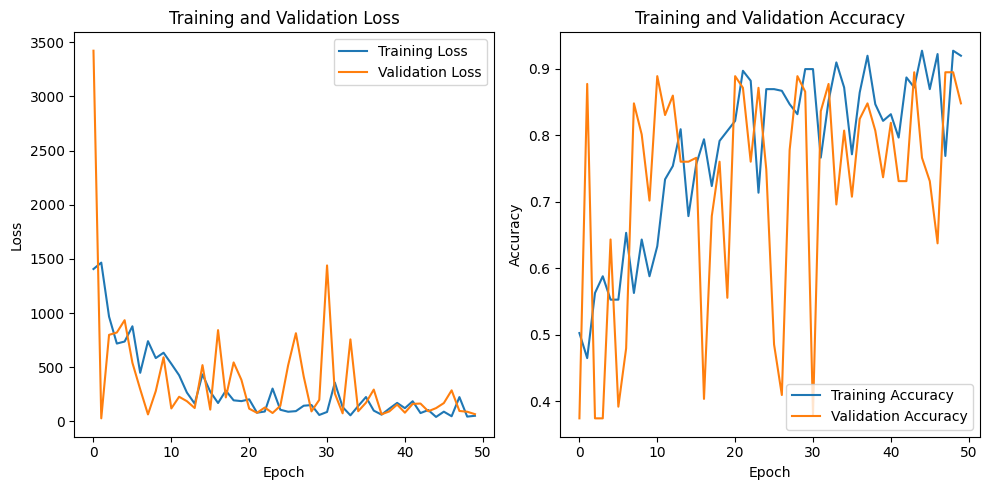

In [7]:
# =========================================================
# LISTING 3-3: SLP CON KERAS - Breast Cancer
# =========================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# 1) Cargar dataset
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, y.shape)

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 3) Modelo SLP
model_1 = Sequential()
# Una sola neurona (units=1) -> clasificación binaria
model_1.add(Dense(units=1, input_dim=X.shape[1], activation='sigmoid'))
model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# 4) Entrenar
history = model_1.fit(X_train, y_train, epochs=50, batch_size=32,
                      validation_data=(X_test, y_test))

# 5) Evaluar
loss, accuracy = model_1.evaluate(X_train, y_train)
print(f"Train Loss: {loss}, Train Accuracy: {accuracy}")

# 6) Graficar
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc,  label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
X.shape

(569, 30)

In [3]:
X.shape[1]

30

In [4]:
X.shape[0]

569

In [9]:
print(history)